In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

from datetime import datetime

D:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

In [3]:
#input data
data = pd.read_csv('AviationDataEnd2016UP.csv', encoding='ISO-8859-1')

In [4]:
#rename column
data.rename(columns={data.columns[3]: "Date" }, inplace=True) 

In [5]:
#add new column of year
data['Year']=data.Date.map(lambda x:x.split('-')[0])
#add new column of month
data['Month']=data.Date.map(lambda x:x.split('-')[1])

In [63]:
data.rename(columns={data.columns[4]: "Location" }, inplace=True)
data.rename(columns={data.columns[1]: "AccidentType" }, inplace=True)
data.rename(columns={data.columns[2]: "AccidentNumber" }, inplace=True)
data.rename(columns={data.columns[16]: "AmateurBuilt" }, inplace=True)

In [7]:
from sklearn.cluster import KMeans  

In [66]:
# Extracting producers and amateurs
producers = [x for x in data['Make'][data['AmateurBuilt']== 'No'].unique() ]
amateurs  = [x for x in data['Make'][data['AmateurBuilt']== 'Yes'].unique() ]


In [67]:
data

,Event.Id,AccidentType,AccidentNumber,Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,TotalMinorInjuries,TotalUninjured,WeatherCondition,Board,Report.Status,Publication.Date,Year,Month,Injuries,YYMM
0,20170103X43747,Accident,WPR17LA046,2017-01-03,"Paradise, MT",United States,NaN,NaN,NaN,NaN,...,0.0,NaN,VMC,CRUISE,Preliminary,05/01/2017,2017,01,2.0,201701
1,20161230X55950,Accident,WPR17FA044,2016-12-29,"Dabob, WA",United States,47.823611,-122.790000,NaN,NaN,...,0.0,NaN,VMC,NaN,Preliminary,05/01/2017,2016,12,4.0,201612
2,20161229X93022,Accident,CEN17LA062,2016-12-27,"Piedmont, MO",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,VMC,LANDING,Preliminary,03/01/2017,2016,12,0.0,201612
3,20161227X80237,Accident,CEN17LA061,2016-12-27,"Farmington, MO",United States,37.761111,-90.428611,FAM,FARMINGTON RGNL,...,1.0,1.0,VMC,TAKEOFF,Preliminary,29/12/2016,2016,12,1.0,201612
4,20161226X80840,Accident,WPR17FA041,2016-12-26,"Fresno, CA",United States,36.844444,-119.870834,E79,Sierra Sky Park,...,0.0,NaN,VMC,TAKEOFF,Preliminary,05/01/2017,2016,12,2.0,201612
5,20161227X03229,Accident,ERA17FA073,2016-12-26,"Gatlinburg, TN",United States,35.651944,-83.458333,GKT,GATLINBURG-PIGEON FORGE,...,0.0,NaN,IMC,DESCENT,Preliminary,03/01/2017,2016,12,3.0,201612
6,20161223X22808,Accident,ERA17FA072,2016-12-23,"Middlebury, VT",United States,43.981389,-73.094444,6B0,MIDDLEBURY STATE,...,0.0,NaN,VMC,TAKEOFF,Preliminary,04/01/2017,2016,12,1.0,201612
7,20161221X11609,Incident,ENG17WA007,2016-12-21,"Toronto, Canada",Canada,NaN,NaN,NaN,NaN,...,0.0,224.0,NaN,TAKEOFF,Foreign,NaN,2016,12,0.0,201612
8,20161222X21701,Accident,CEN17LA060,2016-12-21,"Millersburg, OH",United States,40.536666,81.955833,10G,Holmes County,...,1.0,1.0,VMC,APPROACH,Preliminary,27/12/2016,2016,12,1.0,201612
9,20161220X20645,Accident,CEN17LA058,2016-12-18,"Blaine, MN",United States,45.195555,-93.162778,NaN,NaN,...,0.0,1.0,VMC,NaN,Preliminary,05/01/2017,2016,12,0.0,201612


In [9]:
data['Total.Fatal.Injuries'].fillna(0, inplace=True)

In [10]:
data['Total.Serious.Injuries'].fillna(0, inplace=True)

In [11]:
data['Total.Minor.Injuries'].fillna(0, inplace=True)

In [12]:
data['Injuries'] = data['Total.Fatal.Injuries'] + data['Total.Serious.Injuries'] + data['Total.Minor.Injuries']

In [13]:
from sklearn.model_selection import KFold

In [14]:
data.rename(columns={data.columns[23]: "TotalFatalInjuries" }, inplace=True)
data.rename(columns={data.columns[24]: "TotalSeriousInjuries" }, inplace=True)
data.rename(columns={data.columns[25]: "TotalMinorInjuries" }, inplace=True)
data.rename(columns={data.columns[26]: "TotalUninjured" }, inplace=True)
data.rename(columns={data.columns[27]: "WeatherCondition" }, inplace=True)
data.rename(columns={data.columns[28]: "Board" }, inplace=True)
data.rename(columns={data.columns[15]: "Model" }, inplace=True)

In [15]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 10 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

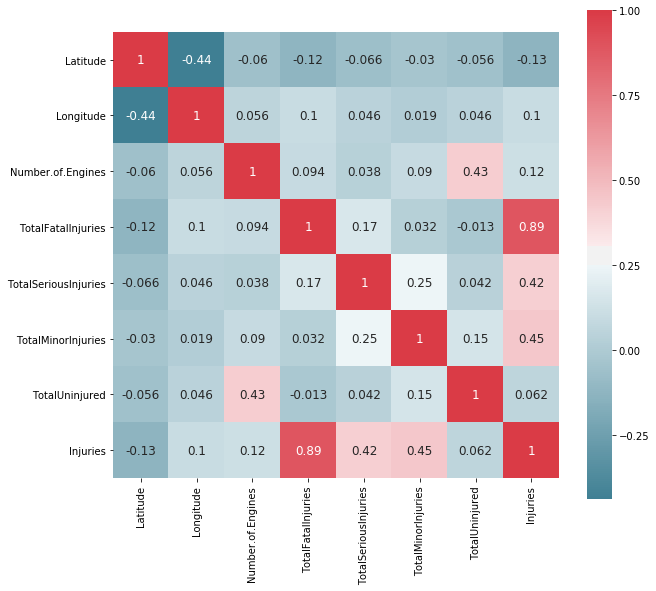

In [16]:
plot_correlation_map(data)

In [17]:
df=data

Score for degree 0: 0.036 - prediction for 2017 is 2159
Score for degree 1: 0.354 - prediction for 2017 is 1267
Score for degree 2: 0.450 - prediction for 2017 is 663


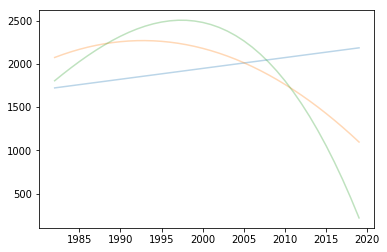

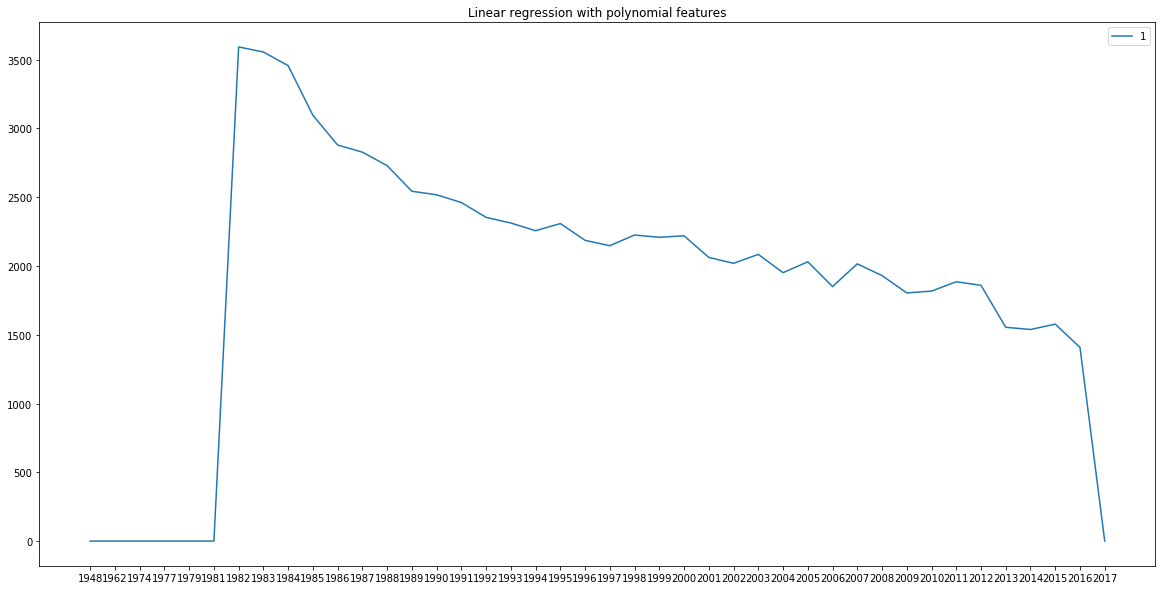

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


events_per_year = df.groupby(by='Year').count()['AccidentNumber']


X = [ [y] for y in events_per_year.index.values]
y = [ [e] for e in events_per_year.as_matrix()]


degrees = [1,2,3]
lr_pred_X = [[y] for y in range(1982, 2020)]
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)
    lr_pred=pipeline.predict(lr_pred_X)
    plt.plot(lr_pred_X, lr_pred, alpha=.3)
    
    print("Score for degree %d: %.3f - prediction for 2017 is %d" % (i, pipeline.score(X, y), lr_pred[35]))
plt.subplots( figsize =( 20 , 10 ) )
plt.plot(X, y)
plt.title("Linear regression with polynomial features")
plt.legend(labels=degrees)
plt.show()

In [19]:
data['YYMM']=data.Date.map(lambda x:x.split('-')[0])+data.Date.map(lambda x:x.split('-')[1])

In [20]:
t2=data.groupby('YYMM')[['TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','Injuries']].sum().sort_values(by = 'TotalFatalInjuries',ascending = False)

In [21]:
t2

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,Injuries
YYMM,,,,
199611,940.0,82.0,30.0,1052.0
200508,447.0,113.0,53.0,613.0
200906,439.0,32.0,36.0,507.0
201407,427.0,42.0,45.0,514.0
199602,394.0,29.0,84.0,507.0
200609,367.0,20.0,27.0,414.0
200111,348.0,32.0,33.0,413.0
198512,345.0,56.0,94.0,495.0
200808,339.0,70.0,92.0,501.0


In [22]:
t2['YM'] = t2.index

In [23]:
d2=t2[t2.TotalFatalInjuries>10]

In [24]:
d2

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,Injuries,YM
YYMM,,,,,
199611,940.0,82.0,30.0,1052.0,199611
200508,447.0,113.0,53.0,613.0,200508
200906,439.0,32.0,36.0,507.0,200906
201407,427.0,42.0,45.0,514.0,201407
199602,394.0,29.0,84.0,507.0,199602
200609,367.0,20.0,27.0,414.0,200609
200111,348.0,32.0,33.0,413.0,200111
198512,345.0,56.0,94.0,495.0,198512
200808,339.0,70.0,92.0,501.0,200808


In [25]:
t3=data.groupby('Year')[['TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','Injuries']].sum().sort_values(by = 'TotalFatalInjuries',ascending = False)

In [26]:
t3['YM'] = t3.index

In [27]:
d3=t3[t3.TotalFatalInjuries>10]

In [74]:
d4=d3[['Injuries','YM','TotalFatalInjuries']]

In [29]:
d3.apply(pd.to_numeric, errors='ignore')

,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,Injuries,YM
Year,,,,,
1996,2533.0,532.0,729.0,3794.0,1996
2000,1765.0,501.0,1256.0,3522.0,2000
2001,1709.0,478.0,612.0,2799.0,2001
2005,1689.0,426.0,620.0,2735.0,2005
1985,1648.0,612.0,1108.0,3368.0,1985
1982,1585.0,727.0,998.0,3310.0,1982
1989,1532.0,518.0,1029.0,3079.0,1989
2006,1489.0,420.0,473.0,2382.0,2006
2014,1436.0,319.0,470.0,2225.0,2014


In [69]:
d4

,Injuries,YM
Year,,
1996,3794.0,1996
2000,3522.0,2000
2001,2799.0,2001
2005,2735.0,2005
1985,3368.0,1985
1982,3310.0,1982
1989,3079.0,1989
2006,2382.0,2006
2014,2225.0,2014


In [30]:
df = pd.DataFrame(d3, dtype='float') 

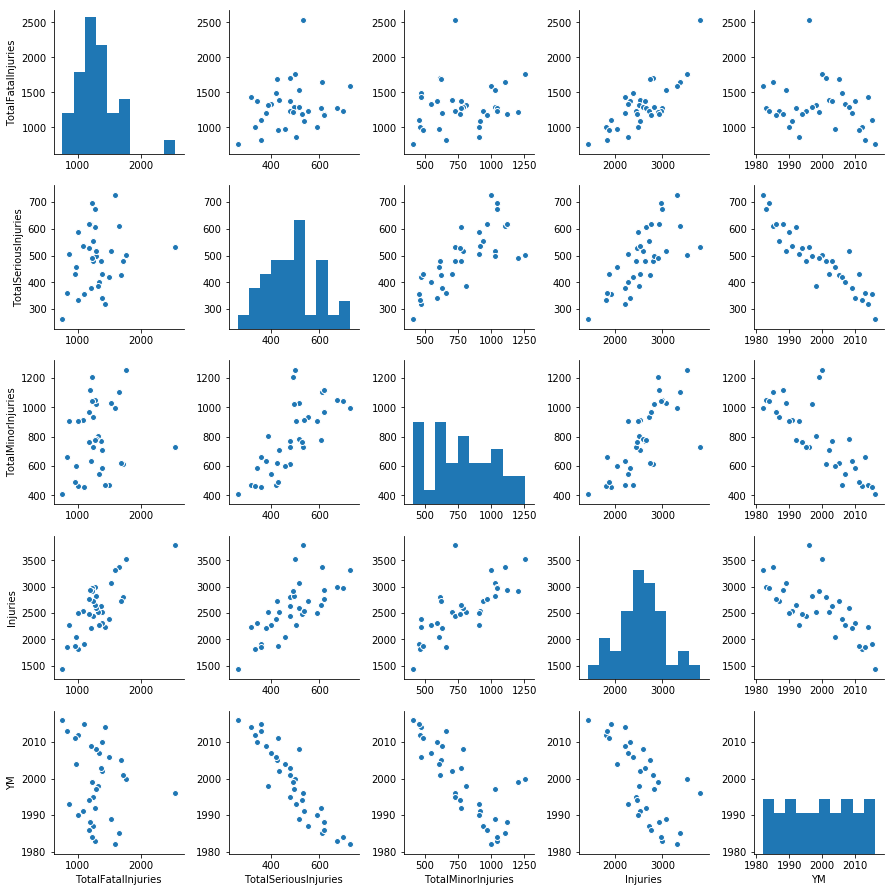

In [31]:
sns.pairplot(df)

In [32]:
from scipy.cluster.hierarchy import linkage,dendrogram

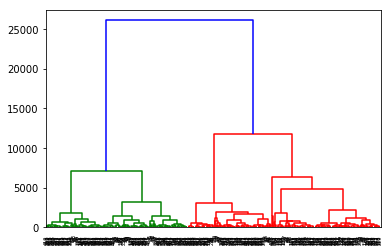

In [33]:
Z= linkage(t2,method='ward',metric = 'euclidean')
p=dendrogram(Z,0)
plt.show()

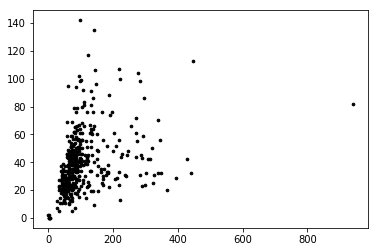

In [34]:
f1 = t2['TotalFatalInjuries'].values
f2 = t2['TotalSeriousInjuries'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [35]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 879.  612.]
 [ 868.  855.]
 [ 384.  871.]]


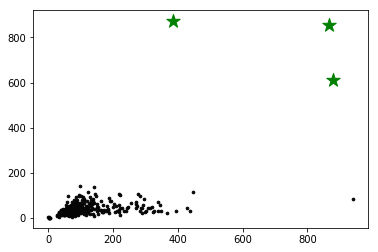

In [36]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [37]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [38]:
from copy import deepcopy

In [40]:
clf = KMeans(n_clusters=3)  
y_pred = clf.fit_predict(t2) 

In [41]:
from sklearn.cluster import KMeans  

In [49]:
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

In [50]:
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

IndexError: too many indices for array

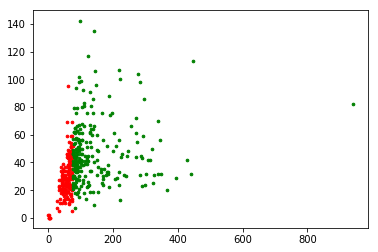

In [51]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [43]:
clf = KMeans(n_clusters=3)

In [44]:
s = clf.fit(d3)

In [45]:
numSamples = len(d3) 
centroids = clf.labels_

In [46]:
from sklearn.decomposition import PCA

In [47]:
clf = KMeans(n_clusters=2)    
y_pred = clf.fit_predict(X)    
print(clf)     
print(y_pred)    
  
 
    
x = [n[0] for n in X]    
   
y = [n[1] for n in X]    

  


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

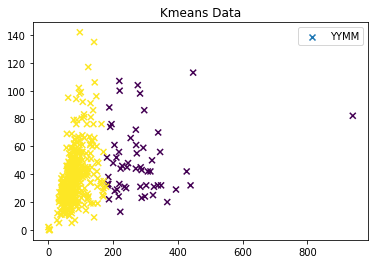

In [52]:
# visable
plt.scatter(x, y, c=y_pred, marker='x')     
plt.title("Kmeans Data")     
plt.xlabel("")    
plt.ylabel("")    
plt.legend(["YYMM"])     
plt.show()    

 generate the same clusters

produce 2 groups,but not too obvious

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
X1 = d3[['YM']].values

y1 = d3[['TotalSeriousInjuries']].values

model = LinearRegression()

model.fit(X1, y1)
X = df["YM"]
y = df["TotalSeriousInjuries"]
model1 = sm.OLS(X,y).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YM   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     637.2
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           1.33e-23
Time:                        20:17:33   Log-Likelihood:                -263.48
No. Observations:                  35   AIC:                             529.0
Df Residuals:                      34   BIC:                             530.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
TotalSeriousInjuries     3.8953      0.154     25.242      0.000       3.582       4.209
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.565
Skew:                          -0.167   Prob(JB):                        0.754
Kurtosis:                       2.474   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

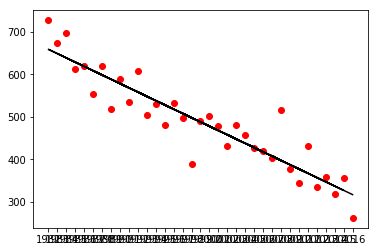

In [55]:
plt.scatter(X1, y1,color='r')

plt.plot(X1, model.predict(X1),color='k')

plt.show()

In [56]:
X2 = d3[['YM']].values

y2 = d3[['TotalFatalInjuries']].values

model = LinearRegression()

model.fit(X1, y1)
X = df["YM"]
y = df["TotalFatalInjuries"]
model2 = sm.OLS(X,y).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YM   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     549.4
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           1.44e-22
Time:                        20:17:34   Log-Likelihood:                -265.93
No. Observations:                  35   AIC:                             533.9
Df Residuals:                      34   BIC:                             535.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
TotalFatalInjuries     1.4455      0.062     23.439      0.000       1.320       1.571
==============================================================================
Omnibus:                       19.933   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.462
Skew:                          -1.393   Prob(JB):                     5.42e-08
Kurtosis:                       6.896   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

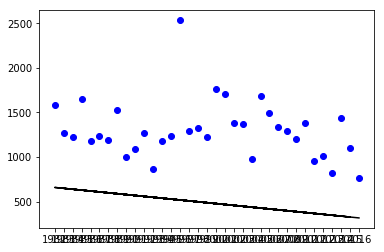

In [57]:
plt.scatter(X2, y2,color='b')

plt.plot(X2, model.predict(X2),color='k')

plt.show()

In [58]:
from sklearn.model_selection import KFold
import nltk

In [59]:
t3=df[['TotalFatalInjuries', 'TotalSeriousInjuries']]

In [60]:
kf = KFold(n_splits=3)
sum = 0
for train, test in kf.split(t3):
    train_data = np.array(t3)[train]
    test_data = np.array(t3)[test]
    classifier = nltk.NaiveBayesClassifier.train(train_data)
    sum += nltk.classify.accuracy(classifier, test_data)
average = sum/3

AttributeError: 'numpy.float64' object has no attribute 'items'

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [77]:
d4['TotalFatalInjuries'] = 1.0
pred=['Injuries','YM']

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
hours_pass_model = sm.Logit(d4['TotalFatalInjuries'], d4[pred]).fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

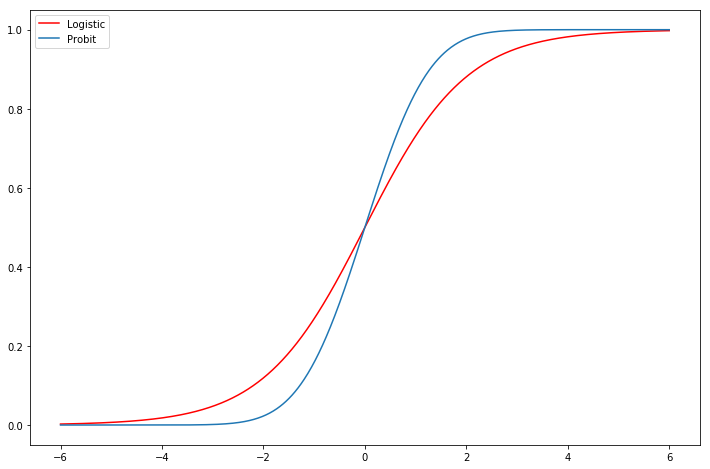

In [79]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

In [81]:
hours_pass_model = sm.Logit(d4['Injuries'], d4[['Injuries','YM']]).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).